In [180]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
dataset = MNIST(root='data/', download = True)
len(dataset)

60000

In [150]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

label:  0


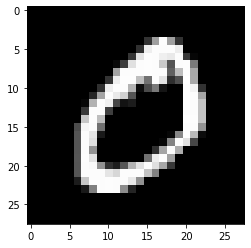

In [151]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print("label: ", label)

In [152]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [153]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [154]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [155]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [156]:
input_size  = 28 * 28
num_classes = 10
model = nn.Linear(input_size, num_classes)

In [157]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0310,  0.0010, -0.0299,  ..., -0.0201, -0.0193, -0.0063],
         [ 0.0318,  0.0153,  0.0307,  ...,  0.0123,  0.0241, -0.0259],
         [ 0.0080, -0.0345, -0.0182,  ..., -0.0030,  0.0126,  0.0048],
         ...,
         [ 0.0025, -0.0168, -0.0255,  ...,  0.0259, -0.0134, -0.0271],
         [-0.0349, -0.0089,  0.0152,  ..., -0.0051, -0.0337, -0.0161],
         [ 0.0079,  0.0030,  0.0007,  ...,  0.0201,  0.0213, -0.0210]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0060, -0.0271, -0.0118,  0.0143,  0.0116, -0.0099,  0.0332,  0.0236,
         -0.0282,  0.0107], requires_grad=True)]

In [158]:
for images, labels in train_loader:
    images = images.reshape(-1,784)
    print(labels.shape)
    print(images.shape)
    outputs = model(images)
    print(outputs[0])
    break

torch.Size([128])
torch.Size([128, 784])
tensor([ 0.0139,  0.1872,  0.3135, -0.3272,  0.2612, -0.1745, -0.0126, -0.0965,
         0.0020,  0.1576], grad_fn=<SelectBackward0>)


In [159]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [160]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [161]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0250, -0.0241, -0.0217,  ..., -0.0184,  0.0122,  0.0343],
         [ 0.0337, -0.0310,  0.0334,  ...,  0.0042, -0.0334,  0.0298],
         [-0.0164,  0.0124, -0.0018,  ..., -0.0136,  0.0144, -0.0105],
         ...,
         [-0.0098, -0.0116, -0.0068,  ..., -0.0281,  0.0142,  0.0011],
         [-0.0311, -0.0175, -0.0203,  ...,  0.0064,  0.0258, -0.0006],
         [-0.0032, -0.0034,  0.0129,  ..., -0.0334,  0.0292,  0.0086]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0105,  0.0054,  0.0246, -0.0303,  0.0327,  0.0067, -0.0060,  0.0122,
         -0.0210,  0.0146], requires_grad=True)]

In [162]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    print(outputs[:2])
    break

torch.Size([128, 1, 28, 28])
tensor([[ 0.0066,  0.2558, -0.1170, -0.0712, -0.3823, -0.0849, -0.2989,  0.1188,
          0.1442,  0.0589],
        [ 0.1628,  0.2116, -0.6214, -0.1728, -0.3714, -0.2145, -0.4203, -0.0871,
          0.2125,  0.1486]], grad_fn=<SliceBackward0>)


In [163]:
probs = F.softmax(outputs, dim = 1)
print(probs[:2])
print(torch.sum(probs[0]).item())

tensor([[0.1027, 0.1317, 0.0907, 0.0950, 0.0696, 0.0937, 0.0756, 0.1149, 0.1178,
         0.1082],
        [0.1271, 0.1335, 0.0580, 0.0909, 0.0745, 0.0872, 0.0709, 0.0990, 0.1336,
         0.1253]], grad_fn=<SliceBackward0>)
1.0000001192092896


In [164]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(labels)

tensor([1, 8, 8, 8, 1, 8, 1, 8, 8, 9, 1, 8, 8, 8, 8, 8, 1, 8, 8, 1, 7, 8, 8, 1,
        8, 8, 8, 8, 8, 8, 8, 1, 1, 7, 8, 1, 8, 8, 8, 8, 1, 8, 8, 7, 8, 7, 8, 7,
        8, 8, 1, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 7, 1, 8, 1, 8, 8, 8, 1, 7, 7,
        8, 7, 8, 8, 1, 8, 7, 5, 8, 8, 9, 8, 1, 8, 8, 3, 8, 8, 9, 1, 8, 1, 8, 8,
        8, 1, 8, 1, 8, 8, 0, 1, 1, 1, 8, 8, 8, 1, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8,
        1, 1, 8, 8, 8, 8, 8, 8])
tensor([7, 5, 3, 7, 9, 1, 9, 4, 2, 5, 9, 8, 4, 3, 0, 8, 4, 5, 4, 9, 3, 1, 2, 8,
        0, 2, 0, 2, 2, 2, 3, 7, 7, 4, 4, 9, 7, 1, 7, 1, 6, 4, 9, 5, 0, 0, 1, 0,
        7, 2, 7, 5, 3, 7, 7, 3, 3, 7, 1, 2, 8, 3, 1, 4, 6, 7, 5, 9, 2, 9, 0, 0,
        6, 2, 6, 7, 7, 3, 7, 7, 3, 3, 8, 3, 4, 0, 6, 7, 0, 0, 1, 6, 3, 7, 0, 8,
        5, 4, 8, 4, 6, 6, 5, 9, 5, 9, 0, 6, 6, 7, 6, 0, 0, 3, 8, 2, 2, 9, 9, 5,
        4, 2, 4, 4, 8, 2, 5, 3])


In [165]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
accuracy(outputs, labels)

tensor(0.0625)

In [166]:
outputs

tensor([[ 0.0066,  0.2558, -0.1170,  ...,  0.1188,  0.1442,  0.0589],
        [ 0.1628,  0.2116, -0.6214,  ..., -0.0871,  0.2125,  0.1486],
        [-0.0487,  0.2205, -0.4560,  ...,  0.0999,  0.4954, -0.0896],
        ...,
        [-0.1581,  0.1754, -0.3866,  ..., -0.0094,  0.4533, -0.0024],
        [-0.1852, -0.0150, -0.0374,  ...,  0.0204,  0.2952,  0.1101],
        [-0.0162,  0.1057, -0.0882,  ..., -0.0192,  0.3886,  0.1802]],
       grad_fn=<AddmmBackward0>)

In [167]:
loss_fn = F.cross_entropy
loss_fn(outputs, labels)

tensor(2.3343, grad_fn=<NllLossBackward0>)

In [168]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
    
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [169]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [170]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3498806953430176, 'val_acc': 0.04994066432118416}

In [171]:
history1 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9632, val_acc: 0.5925
Epoch [1], val_loss: 1.6868, val_acc: 0.7197
Epoch [2], val_loss: 1.4815, val_acc: 0.7582
Epoch [3], val_loss: 1.3273, val_acc: 0.7826
Epoch [4], val_loss: 1.2091, val_acc: 0.7966
Epoch [5], val_loss: 1.1166, val_acc: 0.8055
Epoch [6], val_loss: 1.0426, val_acc: 0.8133
Epoch [7], val_loss: 0.9822, val_acc: 0.8199
Epoch [8], val_loss: 0.9319, val_acc: 0.8242
Epoch [9], val_loss: 0.8895, val_acc: 0.8282
Epoch [10], val_loss: 0.8531, val_acc: 0.8312
Epoch [11], val_loss: 0.8216, val_acc: 0.8334
Epoch [12], val_loss: 0.7940, val_acc: 0.8359
Epoch [13], val_loss: 0.7697, val_acc: 0.8386
Epoch [14], val_loss: 0.7480, val_acc: 0.8404
Epoch [15], val_loss: 0.7286, val_acc: 0.8434
Epoch [16], val_loss: 0.7110, val_acc: 0.8444
Epoch [17], val_loss: 0.6950, val_acc: 0.8461
Epoch [18], val_loss: 0.6805, val_acc: 0.8480
Epoch [19], val_loss: 0.6672, val_acc: 0.8495


In [172]:
history2 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6549, val_acc: 0.8509
Epoch [1], val_loss: 0.6435, val_acc: 0.8518
Epoch [2], val_loss: 0.6330, val_acc: 0.8538
Epoch [3], val_loss: 0.6232, val_acc: 0.8558
Epoch [4], val_loss: 0.6140, val_acc: 0.8576
Epoch [5], val_loss: 0.6055, val_acc: 0.8585
Epoch [6], val_loss: 0.5975, val_acc: 0.8593
Epoch [7], val_loss: 0.5899, val_acc: 0.8606
Epoch [8], val_loss: 0.5828, val_acc: 0.8616
Epoch [9], val_loss: 0.5761, val_acc: 0.8621
Epoch [10], val_loss: 0.5697, val_acc: 0.8630
Epoch [11], val_loss: 0.5637, val_acc: 0.8636
Epoch [12], val_loss: 0.5580, val_acc: 0.8645
Epoch [13], val_loss: 0.5525, val_acc: 0.8656
Epoch [14], val_loss: 0.5473, val_acc: 0.8661
Epoch [15], val_loss: 0.5424, val_acc: 0.8667
Epoch [16], val_loss: 0.5376, val_acc: 0.8676
Epoch [17], val_loss: 0.5331, val_acc: 0.8683
Epoch [18], val_loss: 0.5288, val_acc: 0.8685
Epoch [19], val_loss: 0.5246, val_acc: 0.8686


In [173]:
history3 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5207, val_acc: 0.8695
Epoch [1], val_loss: 0.5168, val_acc: 0.8703
Epoch [2], val_loss: 0.5131, val_acc: 0.8709
Epoch [3], val_loss: 0.5096, val_acc: 0.8713
Epoch [4], val_loss: 0.5062, val_acc: 0.8711
Epoch [5], val_loss: 0.5029, val_acc: 0.8719
Epoch [6], val_loss: 0.4997, val_acc: 0.8721
Epoch [7], val_loss: 0.4966, val_acc: 0.8733
Epoch [8], val_loss: 0.4937, val_acc: 0.8737
Epoch [9], val_loss: 0.4908, val_acc: 0.8740
Epoch [10], val_loss: 0.4880, val_acc: 0.8743
Epoch [11], val_loss: 0.4854, val_acc: 0.8747
Epoch [12], val_loss: 0.4827, val_acc: 0.8755
Epoch [13], val_loss: 0.4802, val_acc: 0.8757
Epoch [14], val_loss: 0.4778, val_acc: 0.8765
Epoch [15], val_loss: 0.4754, val_acc: 0.8770
Epoch [16], val_loss: 0.4731, val_acc: 0.8777
Epoch [17], val_loss: 0.4708, val_acc: 0.8779
Epoch [18], val_loss: 0.4687, val_acc: 0.8788
Epoch [19], val_loss: 0.4665, val_acc: 0.8786


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

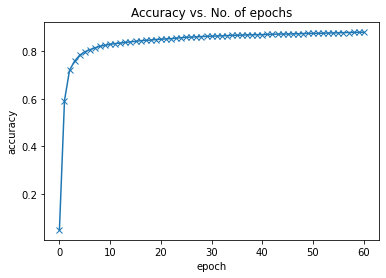

In [174]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [175]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

img, label = test_dataset[0]
# plt.imshow(img, cmap="gray")
print(label)
img.shape

7


torch.Size([1, 28, 28])

In [176]:
def predict_img(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)
    return pred.item()
predict_img(img, model)

7

Label: 7 , Predicted: 7


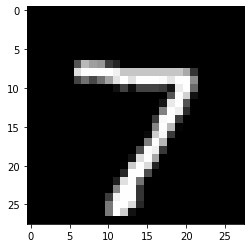

In [177]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_img(img, model))

In [178]:
for i in range(20):
    img, label = test_dataset[i]
    if label == predict_img(img, model):
        print('Label:', label, ', Predicted:', predict_img(img, model), "Yes")
    else:
        print('Label:', label, ', Predicted:', predict_img(img, model), "No")

Label: 7 , Predicted: 7 Yes
Label: 2 , Predicted: 2 Yes
Label: 1 , Predicted: 1 Yes
Label: 0 , Predicted: 0 Yes
Label: 4 , Predicted: 4 Yes
Label: 1 , Predicted: 1 Yes
Label: 4 , Predicted: 4 Yes
Label: 9 , Predicted: 9 Yes
Label: 5 , Predicted: 6 No
Label: 9 , Predicted: 9 Yes
Label: 0 , Predicted: 0 Yes
Label: 6 , Predicted: 6 Yes
Label: 9 , Predicted: 9 Yes
Label: 0 , Predicted: 0 Yes
Label: 1 , Predicted: 1 Yes
Label: 5 , Predicted: 5 Yes
Label: 9 , Predicted: 9 Yes
Label: 7 , Predicted: 7 Yes
Label: 3 , Predicted: 3 Yes
Label: 4 , Predicted: 4 Yes


In [179]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.4442563056945801, 'val_acc': 0.888378918170929}